## Getting Started with Qiskit

https://qiskit.org/documentation/tutorials/circuits/1_getting_started_with_qiskit.html

In [45]:
# initialization
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, transpile

# import basic plot tools
from qiskit.visualization import plot_histogram

Here, we provide an overview of working with Qiskit. The fundamental package of Qiskit is Terra that provides the basic building blocks necessary to program quantum computers. The fundamental unit of Qiskit is the quantum circuit. A basic workflow using Qiskit consists of two stages: Build and Execute. Build allows you to make different quantum circuits that represent the problem you are solving, and Execute that allows you to run them on different backends. After the jobs have been run, the data is collected and postprocessed depending on the desired output.

#### Building the circuit

The basic element needed for your first program is the QuantumCircuit. We begin by creating a QuantumCircuit comprised of three qubits.

In [46]:
circuit = QuantumCircuit(3)

After you create the circuit with its registers, you can add gates (“operations”) to manipulate the registers. As you proceed through the tutorials you will find more gates and circuits; below is an example of a quantum circuit that makes a three-qubit GHZ state

$$ |\psi\rangle = \frac{1}{\sqrt{2}}\left(|000\rangle + |111\rangle \right)$$

To create such a state, we start with a three-qubit quantum register. By default, each qubit in the register is initialized to $|0\rangle$. To make the GHZ state, we apply the following gates: 
- A Hadamard gate on qubit 0
- A A controlled-Not operation between qubits 0 and 1
- A A controlled-Not operation between qubits 0 and 2

In [47]:
# Add a H gate on qubit $q_{0}$, putting this qubit in superposition.
circuit.h(0)
# Add a CX (CNOT) gate on control qubit $q_{0}$ and target qubit $q_{1}$, putting
# the qubits in a Bell state.
circuit.cx(0, 1)
# Add a CX (CNOT) gate on control qubit $q_{0}$ and target qubit $q_{2}$, putting
# the qubits in a GHZ state.
circuit.cx(0, 2)

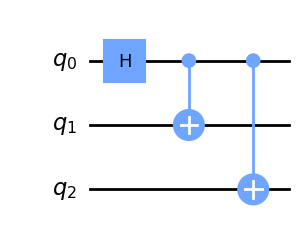

In [48]:
circuit.draw('mpl')

## Simulating circuits

Qiskit Aer is a package for simulating quantum circuits. It provides many different backends for doing a simulation. There is also a basic, Python only, implementation called BasicAer in Terra that can be used as a drop-in replacement for Aer in the examples below.

### Statevector backend

This simulator returns the quantum state, which is a complex vector of dimensions $2^n$, where $n$ is the number of qubits (so be careful using this as it will quickly get too large to run on your machine).


In [49]:
# Import Aer
from qiskit import Aer

# Run the quantum circuit on a statevector simulator backend
backend = Aer.get_backend('statevector_simulator')

Now that we have chosen the backend, it’s time to compile and run the quantum circuit. In Qiskit we provide the run method for this. run returns a job object that encapsulates information about the job submitted to the backend.

In [50]:
# Create a Quantum Program for execution
job = backend.run(circuit)
job

When you run a program, a job object is made that has the following two useful methods: job.status() and job.result(), which return the status of the job and a result object, respectively.

Note: Jobs run asynchronously, but when the result method is called, it switches to synchronous and waits for it to finish before moving on to another task.

In [51]:
job.status()

<JobStatus.DONE: 'job has successfully run'>

The results object contains the data and Qiskit provides the method result.get_statevector(circ) to return the state vector for the quantum circuit.

In [52]:
result = job.result()
result

Result(backend_name='statevector_simulator', backend_version='0.12.2', qobj_id='', job_id='ca10238e-c94b-4e84-8096-50a4f77725f0', success=True, results=[ExperimentResult(shots=1, success=True, meas_level=2, data=ExperimentResultData(statevector=Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.70710678+0.j],
            dims=(2, 2, 2))), header=QobjExperimentHeader(creg_sizes=[], global_phase=0.0, memory_slots=0, n_qubits=3, name='circuit-164', qreg_sizes=[['q', 3]], metadata={}), status=DONE, seed_simulator=934014695, metadata={'noise': 'ideal', 'batched_shots_optimization': False, 'measure_sampling': True, 'parallel_shots': 1, 'remapped_qubits': False, 'active_input_qubits': [0, 1, 2], 'num_clbits': 0, 'parallel_state_update': 8, 'num_qubits': 3, 'device': 'CPU', 'input_qubit_map': [[2, 2], [1, 1], [0, 0]], 'method': 'statevector', 'result_subtypes': {'statevector': 'single'}, 'resu

In [53]:
outputstate = result.get_statevector(circuit, decimals=10)
print(outputstate)

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.70710678+0.j],
            dims=(2, 2, 2))


In [54]:
outputstate.data.real

array([0.70710678, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.70710678])

This corresponds to the desired state where states $|000\rangle$ and $|111\rangle$ have equal amplitudes.

Qiskit also provides a visualization toolbox to allow you to view these results.

Below, we use the visualization function to plot the real and imaginary components of the state density matrix $\rho$.
Matrix $\rho$ is called *density matrix* of a certain quantum state $|\psi\rangle$ and is calculated as $\rho = |\psi\rangle \langle \psi |$

$$|\psi\rangle = \begin{bmatrix} \frac{1}{\sqrt{2}} & 0 & 0 & \frac{1}{\sqrt{2}} \end{bmatrix} $$

$$\rho = |\psi\rangle \langle \psi |=  \begin{bmatrix} \frac{1}{2} & 0 & 0 & \frac{1}{2} \\ 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 \\ \frac{1}{2} & 0 & 0 & \frac{1}{2} \end{bmatrix}$$

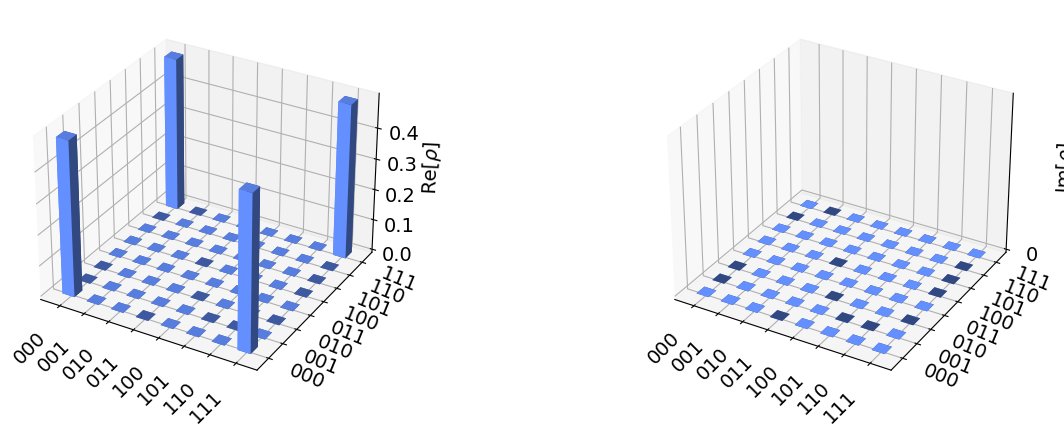

In [11]:
from qiskit.visualization import plot_state_city
plot_state_city(outputstate)

### Unitary backend

Qiskit Aer also includes a unitary_simulator that works provided all the elements in the circuit are unitary operations. This backend calculates the $2^n \times 2^n$ matrix representing the gates in the quantum circuit.
 

In [12]:
# Run the quantum circuit on a unitary simulator backend
backend = Aer.get_backend('unitary_simulator')
job = backend.run(circuit)
result = job.result()

# Show the results
print(result.get_unitary(circuit, decimals=3))

Operator([[ 0.707+0.j,  0.707-0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,
            0.   +0.j,  0.   +0.j,  0.   +0.j],
          [ 0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,
            0.   +0.j,  0.707+0.j, -0.707+0.j],
          [ 0.   +0.j,  0.   +0.j,  0.707+0.j,  0.707-0.j,  0.   +0.j,
            0.   +0.j,  0.   +0.j,  0.   +0.j],
          [ 0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,  0.707+0.j,
           -0.707+0.j,  0.   +0.j,  0.   +0.j],
          [ 0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,  0.707+0.j,
            0.707-0.j,  0.   +0.j,  0.   +0.j],
          [ 0.   +0.j,  0.   +0.j,  0.707+0.j, -0.707+0.j,  0.   +0.j,
            0.   +0.j,  0.   +0.j,  0.   +0.j],
          [ 0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,
            0.   +0.j,  0.707+0.j,  0.707-0.j],
          [ 0.707+0.j, -0.707+0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,
            0.   +0.j,  0.   +0.j,  0.   +0.j]],
         input_dims=(2, 2, 2), output_dims=(2, 

In [13]:
result.get_unitary(circuit, decimals=3).data.real

array([[ 0.707,  0.707,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.707, -0.707],
       [ 0.   ,  0.   ,  0.707,  0.707,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.707, -0.707,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.707,  0.707,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.707, -0.707,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.707,  0.707],
       [ 0.707, -0.707,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ]])

### OpenQASM backend

The simulators above are useful because they provide information about the state output by the ideal circuit and the matrix representation of the circuit. However, a real experiment terminates by measuring each qubit (usually in the computational 
 basis). Without measurement, we cannot gain information about the state. Measurements cause the quantum system to collapse into classical bits.

To simulate a circuit that includes measurement, we need to add measurements to the original circuit above, and use a different Aer backend.

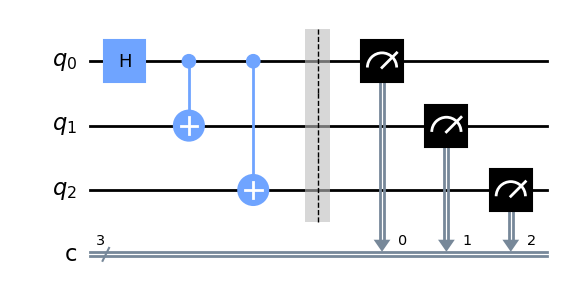

In [14]:
# Create a second part of the quantum circuit that contains only the measurements
measurements = QuantumCircuit(3, 3)

# A barrier is a visual indicator of the grouping of a circuit section. 
# It also acts as a directive for circuit compilation to separate pieces of a circuit so
# that any optimizations or re-writes are constrained to only act between barriers.
measurements.barrier(range(3))

# map the measurement of each qubit to a specific classical bits via its index
measurements.measure(qubit = range(3), cbit = range(3))

# The Qiskit circuit object supports composition using the compose method.
circuit.add_register(measurements.cregs[0])
circuit_full = circuit.compose(measurements)

#drawing the circuit
circuit_full.draw('mpl')

To simulate this circuit, we use the qasm_simulator in Qiskit Aer. Each run of this circuit will yield either the bitstring 000 or 111. To build up statistics about the distribution of the bitstrings (to, e.g., estimate P(000)), we need to repeat the circuit many times. The number of times the circuit is repeated can be specified in the run method, via the shots keyword.

In [15]:
# Use Aer's qasm_simulator
backend_sim = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit to be 1024, which is the default.
job_sim = backend_sim.run(transpile(circuit_full, backend_sim), shots=1024)

# Grab the results from the job.
result_sim = job_sim.result()

In [16]:
result_sim

Result(backend_name='qasm_simulator', backend_version='0.12.2', qobj_id='', job_id='3c574ecb-e85e-40f4-9e8d-27032ef5aabd', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x7': 501, '0x0': 523}), header=QobjExperimentHeader(creg_sizes=[['c', 3]], global_phase=0.0, memory_slots=3, n_qubits=3, name='circuit-120', qreg_sizes=[['q', 3]], metadata={}), status=DONE, seed_simulator=1921935967, metadata={'noise': 'ideal', 'batched_shots_optimization': False, 'measure_sampling': True, 'parallel_shots': 1, 'remapped_qubits': False, 'active_input_qubits': [0, 1, 2], 'num_clbits': 3, 'parallel_state_update': 8, 'sample_measure_time': 0.001663411, 'num_qubits': 3, 'device': 'CPU', 'input_qubit_map': [[2, 2], [1, 1], [0, 0]], 'method': 'stabilizer', 'fusion': {'enabled': False}}, time_taken=0.005017212)], date=2023-11-13T11:35:56.464891, status=COMPLETED, header=None, metadata={'time_taken_execute': 0.00508693, 'mpi_rank': 0, 'num_mp

Once we have a result object, we can access the counts via the function get_counts(circuit). This gives you the aggregated binary outcomes of the circuit you submitted.

In [17]:
counts = result_sim.get_counts(circuit_full)
print(counts)

{'111': 501, '000': 523}


Approximately 50 percent of the time, the output bitstring is 000. Qiskit also provides a function plot_histogram, which allows you to view the outcomes.

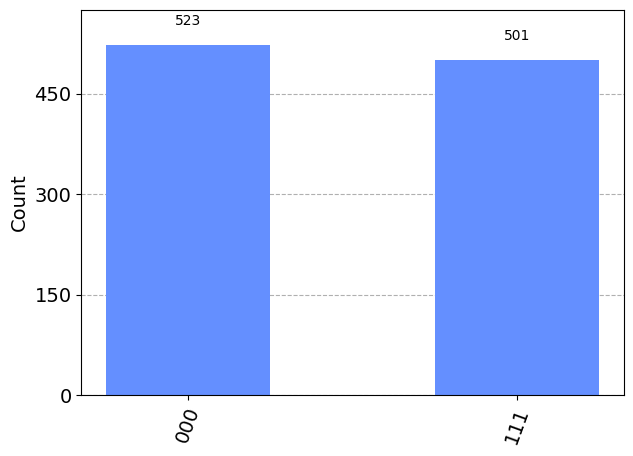

In [18]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

# Run on quantum backends

https://qiskit.org/ecosystem/ibm-runtime/how_to/backends.html

A backend represents either a simulator or a real quantum computer and are responsible for running quantum circuits, running pulse schedules, and returning results.

In qiskit-ibm-runtime, a backend is represented by an instance of the IBMBackend class. Attributes of this class provides information about this backend. For example:
- name: Name of the backend.
- instructions: A list of instructions the backend supports.
- operation_names: A list of instruction names the backend supported.
- num_qubits: The number of qubits the backend has.
- coupling_map: Coupling map of the backend.
- dt: System time resolution of input signals.
- dtm: System time resolution of output signals.

In [20]:
from qiskit_ibm_runtime import QiskitRuntimeService, Estimator, Sampler, Options

service = QiskitRuntimeService()

In [21]:
# Run on the least-busy backend you have access to
backend = service.least_busy(simulator=False, operational=True)
backend

<IBMBackend('ibm_lagos')>

In [22]:
sampler = Sampler(backend)

job = sampler.run(circuits=circuit_full, shots = 100)

base_primitive._run_primitive:INFO:2023-11-13 11:37:06,628: Submitting job using options {'optimization_level': 3, 'resilience_level': 1, 'max_execution_time': None, 'transpilation': {'skip_transpilation': False, 'initial_layout': None, 'layout_method': None, 'routing_method': None, 'approximation_degree': None, 'optimization_settings': {'level': 3}, 'coupling_map': None, 'basis_gates': None}, 'resilience': {'noise_amplifier': 'TwoQubitAmplifier', 'noise_factors': (1, 3, 5), 'extrapolator': 'LinearExtrapolator', 'level': 1}, 'execution': {'shots': 100, 'init_qubits': True, 'noise_model': None, 'seed_simulator': None}, 'environment': {'log_level': 'WARNING', 'callback': None, 'job_tags': []}, 'simulator': {'noise_model': None, 'seed_simulator': None, 'coupling_map': None, 'basis_gates': None}}


In [23]:
# Once the job is complete, get the result
result_qc = job.result()
result_qc

SamplerResult(quasi_dists=[{0: 0.5136143714639217, 1: 0.0017017028673116685, 2: 0.0047899854817503975, 5: 0.004554451769382785, 6: 0.0021396005596811037, 7: 0.4731998878579524}], metadata=[{'shots': 100, 'circuit_metadata': {}, 'readout_mitigation_overhead': 1.1365222302900935, 'readout_mitigation_time': 0.07226090703625232}])

In [24]:
counts = result_qc.quasi_dists
print(counts)

[{0: 0.5136143714639217, 1: 0.0017017028673116685, 2: 0.0047899854817503975, 5: 0.004554451769382785, 6: 0.0021396005596811037, 7: 0.4731998878579524}]


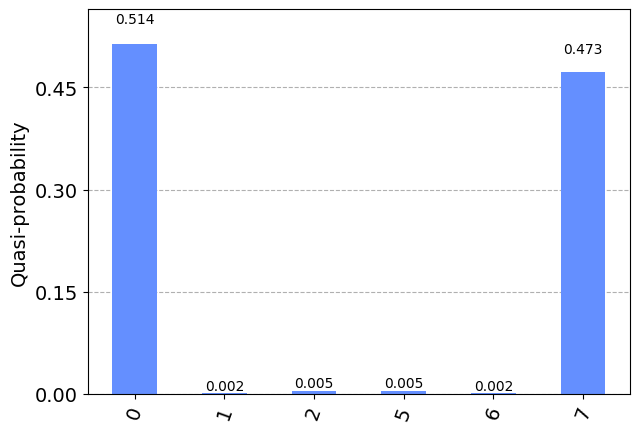

In [25]:
plot_histogram(counts)

You can see that we have non-zero probabilities for states that should not exist, this is the effect of noise.

# Noise builds up as the circuit becomes longer

Let's consider a very simple circuit that only puts two qubits in superposition and then reverses the operation

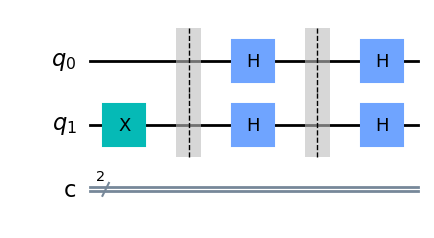

In [40]:
intialization = QuantumCircuit(2, 2)
intialization.x(1)

double_parallel_H = QuantumCircuit(2, 2)
double_parallel_H.barrier()
double_parallel_H.h(0)
double_parallel_H.h(1)
double_parallel_H.barrier()
double_parallel_H.h(0)
double_parallel_H.h(1)

circuit = intialization.compose(double_parallel_H)

circuit.draw('mpl')

The expected result is that the first qubit will be 0 and the second will be 1

In [27]:
backend = Aer.get_backend('statevector_simulator')
job = backend.run(circuit)
result = job.result()

outputstate = result.get_statevector(circuit, decimals=3)
print(outputstate)

Statevector([ 0.+0.j, -0.+0.j,  1.-0.j,  0.+0.j],
            dims=(2, 2))


In [28]:
outputstate.data.real

array([ 0., -0.,  1.,  0.])

Note that $\left(0,0,1,0\right)$ corresponds to $ |1\rangle \otimes |0\rangle$, this is because qiskit orders qubits from right to left in its bitstrings that are: $q_nq_{n-1}...q_1q_0$

In [29]:
# We can compute the probability of measuring 0 or 1 based on the statevector, for qubit 0
outputstate.probabilities_dict(qargs=[0])

{'0': 1.0}

In [30]:
# And for qubit 1
outputstate.probabilities_dict(qargs=[1])

{'1': 1.0}

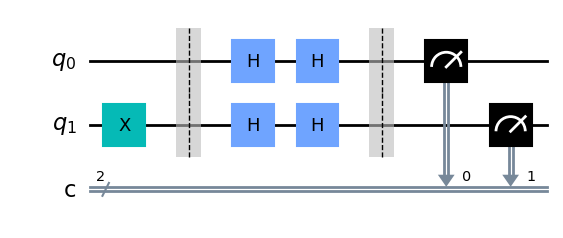

In [31]:
# Create a second part of the quantum circuit that contains only the measurements
measurements = QuantumCircuit(2, 2)
measurements.barrier()

# map the measurement of each qubit to a specific classical bits via its index
measurements.measure(qubit = range(2), cbit = range(2))

# The Qiskit circuit object supports composition using the compose method.
circuit_measurement = circuit.compose(measurements)

#drawing the circuit
circuit_measurement.draw('mpl')

In [32]:
# Use Aer's qasm_simulator
backend_sim = Aer.get_backend('qasm_simulator')
job_sim = backend_sim.run(transpile(circuit_measurement, backend_sim), shots=1024)
result_sim = job_sim.result()
counts = result_sim.get_counts(circuit_measurement)
print(counts)

{'10': 1024}


Remember that due to the quiskit notation, this means qubit 0 is 0 and qubit 1 is 1.

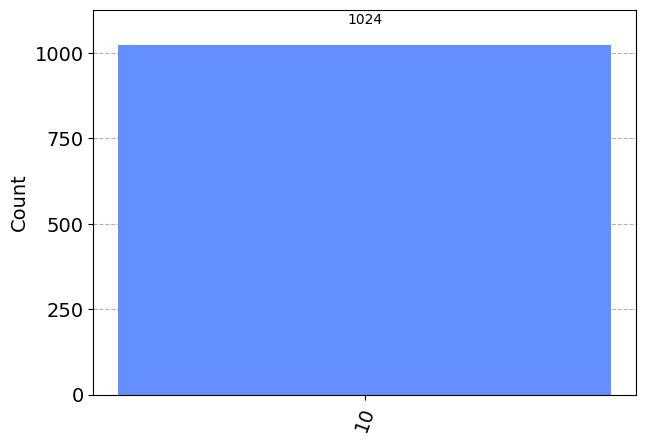

In [33]:
plot_histogram(counts)

Now if we repeat the process 10 times we expect that the final state remains unchanged. However this is not the case with a real QC


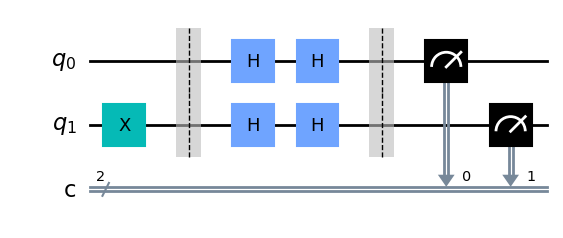

Iteration: 0, counts: {'10': 100}


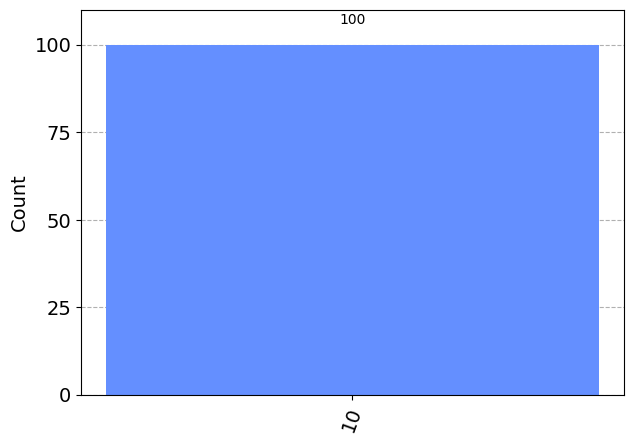

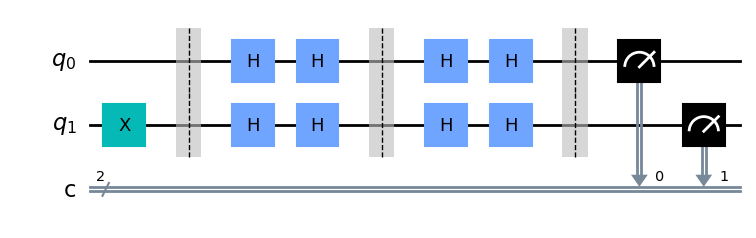

Iteration: 1, counts: {'10': 100}


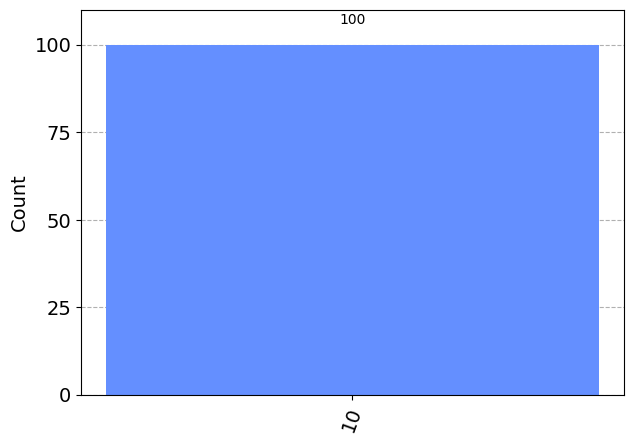

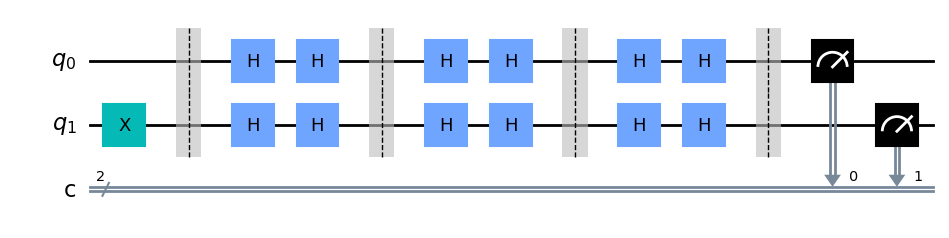

Iteration: 2, counts: {'10': 100}


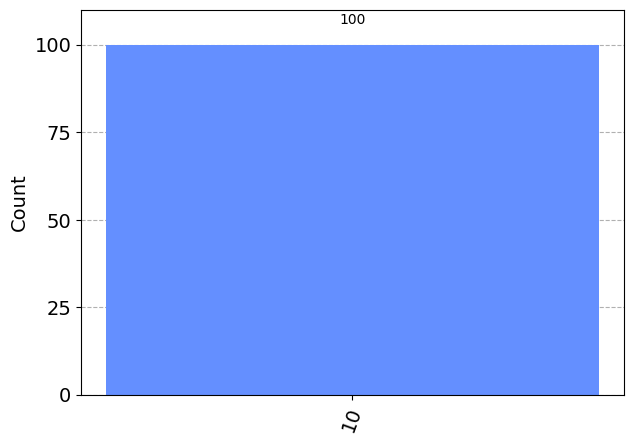

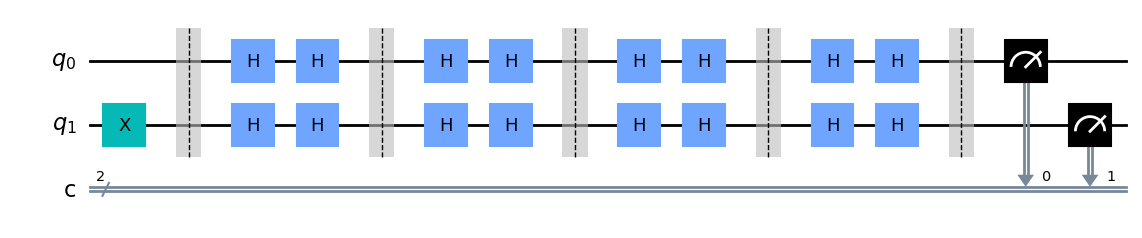

Iteration: 3, counts: {'10': 100}


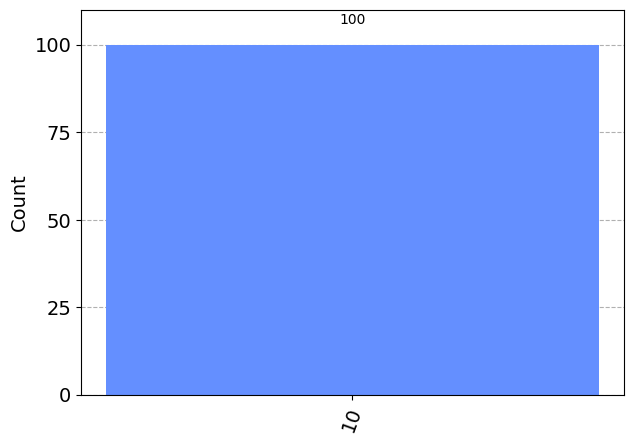

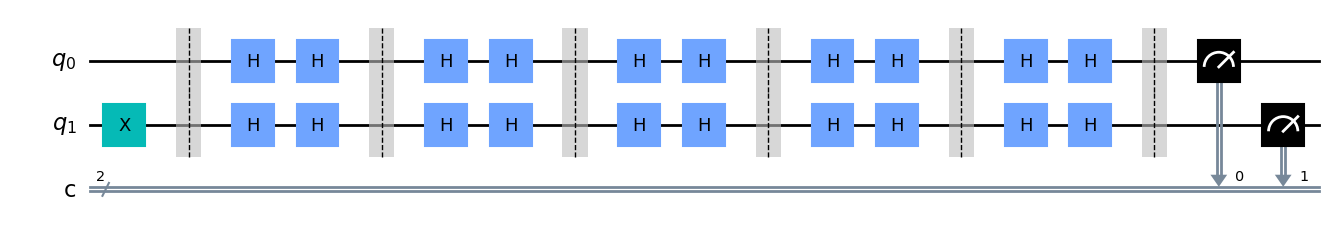

Iteration: 4, counts: {'10': 100}


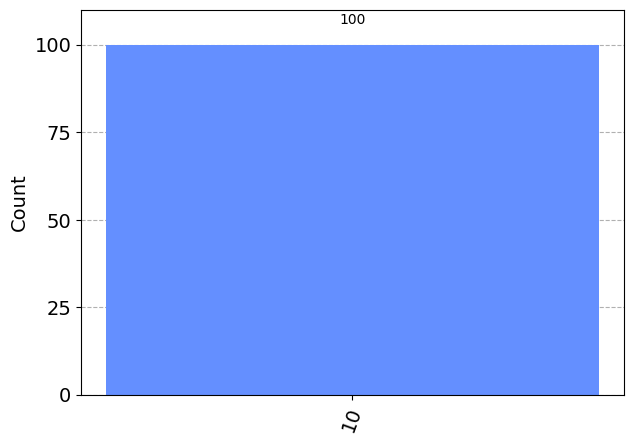

In [ ]:
circuit = intialization
experiment_data = {}

for iteration in range(5):
    circuit = circuit.compose(double_parallel_H)
    circuit_measurement = circuit.compose(measurements)
    display(circuit_measurement.draw('mpl'))
    
    job_sim = backend_sim.run(transpile(circuit_measurement, backend_sim), shots=100)
    result_sim = job_sim.result()
    counts = result_sim.get_counts(circuit_measurement)
    
    experiment_data[iteration] = result_sim
    
    print("Iteration: {}, counts: {}".format(iteration, counts))   
    display(plot_histogram(counts))

base_primitive._run_primitive:INFO:2023-11-13 22:24:56,290: Submitting job using options {'optimization_level': 3, 'resilience_level': 1, 'max_execution_time': None, 'transpilation': {'skip_transpilation': False, 'initial_layout': None, 'layout_method': None, 'routing_method': None, 'approximation_degree': None, 'optimization_settings': {'level': 3}, 'coupling_map': None, 'basis_gates': None}, 'resilience': {'noise_amplifier': 'TwoQubitAmplifier', 'noise_factors': (1, 3, 5), 'extrapolator': 'LinearExtrapolator', 'level': 1}, 'execution': {'shots': 100, 'init_qubits': True, 'noise_model': None, 'seed_simulator': None}, 'environment': {'log_level': 'WARNING', 'callback': None, 'job_tags': []}, 'simulator': {'noise_model': None, 'seed_simulator': None, 'coupling_map': None, 'basis_gates': None}}


Iteration: 0, layers 10, Job_ID: <bound method JobV1.job_id of <RuntimeJob('cn9a4e9n6vt000847yng', 'sampler')>>
Iteration: 0, layers 10, counts: [{0: 0.05117910573915979, 2: 0.9488208942608402}]


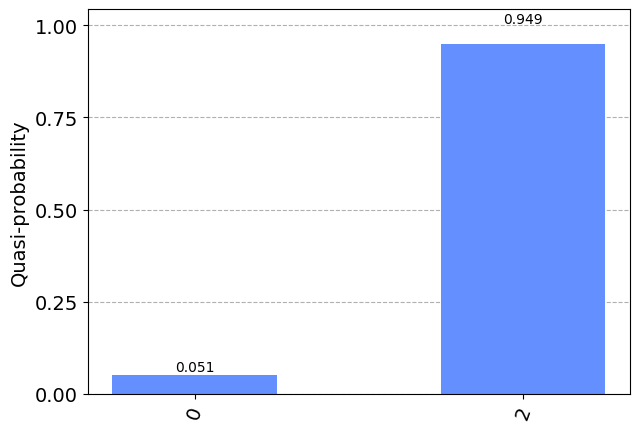

base_primitive._run_primitive:INFO:2023-11-13 22:25:17,270: Submitting job using options {'optimization_level': 3, 'resilience_level': 1, 'max_execution_time': None, 'transpilation': {'skip_transpilation': False, 'initial_layout': None, 'layout_method': None, 'routing_method': None, 'approximation_degree': None, 'optimization_settings': {'level': 3}, 'coupling_map': None, 'basis_gates': None}, 'resilience': {'noise_amplifier': 'TwoQubitAmplifier', 'noise_factors': (1, 3, 5), 'extrapolator': 'LinearExtrapolator', 'level': 1}, 'execution': {'shots': 100, 'init_qubits': True, 'noise_model': None, 'seed_simulator': None}, 'environment': {'log_level': 'WARNING', 'callback': None, 'job_tags': []}, 'simulator': {'noise_model': None, 'seed_simulator': None, 'coupling_map': None, 'basis_gates': None}}


Iteration: 1, layers 20, Job_ID: <bound method JobV1.job_id of <RuntimeJob('cn9a4kjz0b200086hsjg', 'sampler')>>
Iteration: 1, layers 20, counts: [{0: 0.07434440755218316, 1: 0.008258581566746527, 2: 0.8967040723864175, 3: 0.0206929384946529}]


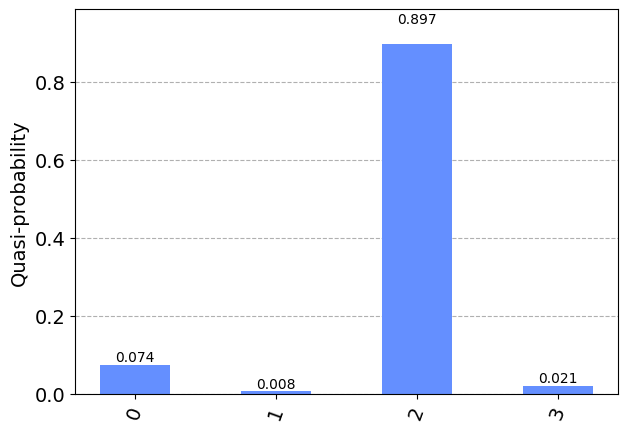

base_primitive._run_primitive:INFO:2023-11-13 22:25:38,448: Submitting job using options {'optimization_level': 3, 'resilience_level': 1, 'max_execution_time': None, 'transpilation': {'skip_transpilation': False, 'initial_layout': None, 'layout_method': None, 'routing_method': None, 'approximation_degree': None, 'optimization_settings': {'level': 3}, 'coupling_map': None, 'basis_gates': None}, 'resilience': {'noise_amplifier': 'TwoQubitAmplifier', 'noise_factors': (1, 3, 5), 'extrapolator': 'LinearExtrapolator', 'level': 1}, 'execution': {'shots': 100, 'init_qubits': True, 'noise_model': None, 'seed_simulator': None}, 'environment': {'log_level': 'WARNING', 'callback': None, 'job_tags': []}, 'simulator': {'noise_model': None, 'seed_simulator': None, 'coupling_map': None, 'basis_gates': None}}


Iteration: 2, layers 30, Job_ID: <bound method JobV1.job_id of <RuntimeJob('cn9a4rvz0b200086hskg', 'sampler')>>
Iteration: 2, layers 30, counts: [{0: 0.19938374531920114, 1: 0.01732899123193642, 2: 0.7730009061810762, 3: 0.010286357267786126}]


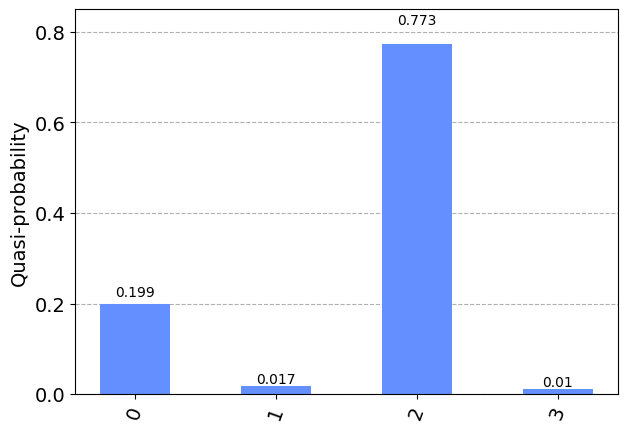

base_primitive._run_primitive:INFO:2023-11-13 22:25:59,867: Submitting job using options {'optimization_level': 3, 'resilience_level': 1, 'max_execution_time': None, 'transpilation': {'skip_transpilation': False, 'initial_layout': None, 'layout_method': None, 'routing_method': None, 'approximation_degree': None, 'optimization_settings': {'level': 3}, 'coupling_map': None, 'basis_gates': None}, 'resilience': {'noise_amplifier': 'TwoQubitAmplifier', 'noise_factors': (1, 3, 5), 'extrapolator': 'LinearExtrapolator', 'level': 1}, 'execution': {'shots': 100, 'init_qubits': True, 'noise_model': None, 'seed_simulator': None}, 'environment': {'log_level': 'WARNING', 'callback': None, 'job_tags': []}, 'simulator': {'noise_model': None, 'seed_simulator': None, 'coupling_map': None, 'basis_gates': None}}


Iteration: 3, layers 40, Job_ID: <bound method JobV1.job_id of <RuntimeJob('cn9a4y3z0b200086hsn0', 'sampler')>>
Iteration: 3, layers 40, counts: [{0: 0.3304892550102186, 1: 0.05730409223625689, 2: 0.5653494079044229, 3: 0.04685724484910162}]


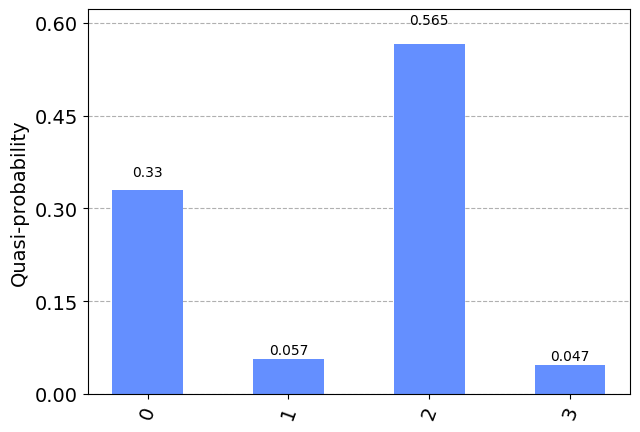

base_primitive._run_primitive:INFO:2023-11-13 22:26:20,774: Submitting job using options {'optimization_level': 3, 'resilience_level': 1, 'max_execution_time': None, 'transpilation': {'skip_transpilation': False, 'initial_layout': None, 'layout_method': None, 'routing_method': None, 'approximation_degree': None, 'optimization_settings': {'level': 3}, 'coupling_map': None, 'basis_gates': None}, 'resilience': {'noise_amplifier': 'TwoQubitAmplifier', 'noise_factors': (1, 3, 5), 'extrapolator': 'LinearExtrapolator', 'level': 1}, 'execution': {'shots': 100, 'init_qubits': True, 'noise_model': None, 'seed_simulator': None}, 'environment': {'log_level': 'WARNING', 'callback': None, 'job_tags': []}, 'simulator': {'noise_model': None, 'seed_simulator': None, 'coupling_map': None, 'basis_gates': None}}


Iteration: 4, layers 50, Job_ID: <bound method JobV1.job_id of <RuntimeJob('cn9a53cq2k7g0088qh9g', 'sampler')>>
Iteration: 4, layers 50, counts: [{0: 0.4277275715690289, 1: 0.02612380270989884, 2: 0.542560185965451, 3: 0.0035884397556213555}]


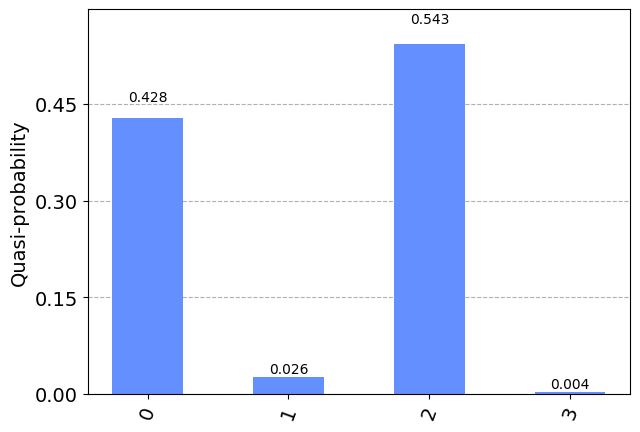

base_primitive._run_primitive:INFO:2023-11-13 22:26:42,445: Submitting job using options {'optimization_level': 3, 'resilience_level': 1, 'max_execution_time': None, 'transpilation': {'skip_transpilation': False, 'initial_layout': None, 'layout_method': None, 'routing_method': None, 'approximation_degree': None, 'optimization_settings': {'level': 3}, 'coupling_map': None, 'basis_gates': None}, 'resilience': {'noise_amplifier': 'TwoQubitAmplifier', 'noise_factors': (1, 3, 5), 'extrapolator': 'LinearExtrapolator', 'level': 1}, 'execution': {'shots': 100, 'init_qubits': True, 'noise_model': None, 'seed_simulator': None}, 'environment': {'log_level': 'WARNING', 'callback': None, 'job_tags': []}, 'simulator': {'noise_model': None, 'seed_simulator': None, 'coupling_map': None, 'basis_gates': None}}


Iteration: 5, layers 60, Job_ID: <bound method JobV1.job_id of <RuntimeJob('cn9a58nq2k7g0088qhb0', 'sampler')>>
Iteration: 5, layers 60, counts: [{0: 0.38685179788084806, 1: 0.025142434030255574, 2: 0.5518481297510109, 3: 0.036157638337885455}]


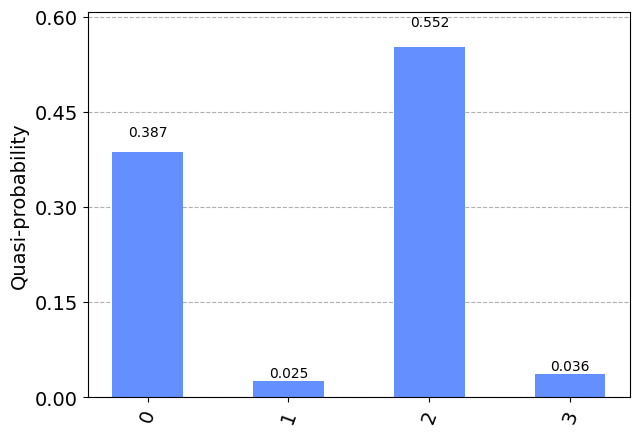

base_primitive._run_primitive:INFO:2023-11-13 22:27:03,486: Submitting job using options {'optimization_level': 3, 'resilience_level': 1, 'max_execution_time': None, 'transpilation': {'skip_transpilation': False, 'initial_layout': None, 'layout_method': None, 'routing_method': None, 'approximation_degree': None, 'optimization_settings': {'level': 3}, 'coupling_map': None, 'basis_gates': None}, 'resilience': {'noise_amplifier': 'TwoQubitAmplifier', 'noise_factors': (1, 3, 5), 'extrapolator': 'LinearExtrapolator', 'level': 1}, 'execution': {'shots': 100, 'init_qubits': True, 'noise_model': None, 'seed_simulator': None}, 'environment': {'log_level': 'WARNING', 'callback': None, 'job_tags': []}, 'simulator': {'noise_model': None, 'seed_simulator': None, 'coupling_map': None, 'basis_gates': None}}


Iteration: 6, layers 70, Job_ID: <bound method JobV1.job_id of <RuntimeJob('cn9a5e5sn2sg0087zgwg', 'sampler')>>
Iteration: 6, layers 70, counts: [{0: 0.279479362382947, 1: 0.03690984420831838, 2: 0.6373683479471914, 3: 0.04624244546154314}]


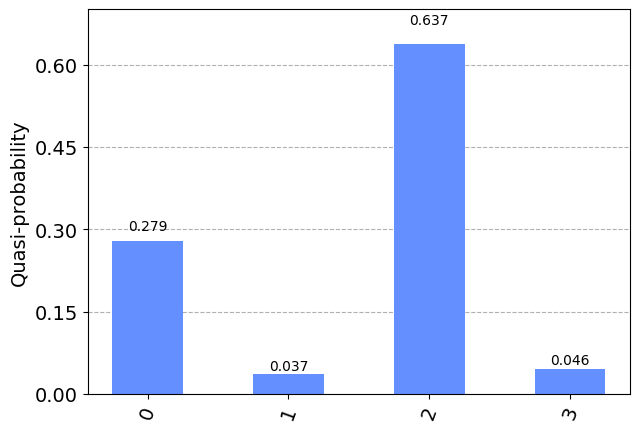

base_primitive._run_primitive:INFO:2023-11-13 22:27:24,625: Submitting job using options {'optimization_level': 3, 'resilience_level': 1, 'max_execution_time': None, 'transpilation': {'skip_transpilation': False, 'initial_layout': None, 'layout_method': None, 'routing_method': None, 'approximation_degree': None, 'optimization_settings': {'level': 3}, 'coupling_map': None, 'basis_gates': None}, 'resilience': {'noise_amplifier': 'TwoQubitAmplifier', 'noise_factors': (1, 3, 5), 'extrapolator': 'LinearExtrapolator', 'level': 1}, 'execution': {'shots': 100, 'init_qubits': True, 'noise_model': None, 'seed_simulator': None}, 'environment': {'log_level': 'WARNING', 'callback': None, 'job_tags': []}, 'simulator': {'noise_model': None, 'seed_simulator': None, 'coupling_map': None, 'basis_gates': None}}


Iteration: 7, layers 80, Job_ID: <bound method JobV1.job_id of <RuntimeJob('cn9a5keq2k7g0088qhd0', 'sampler')>>
Iteration: 7, layers 80, counts: [{0: 0.29286964901031104, 1: 0.024250973557782322, 2: 0.592192733488407, 3: 0.09068664394349953}]


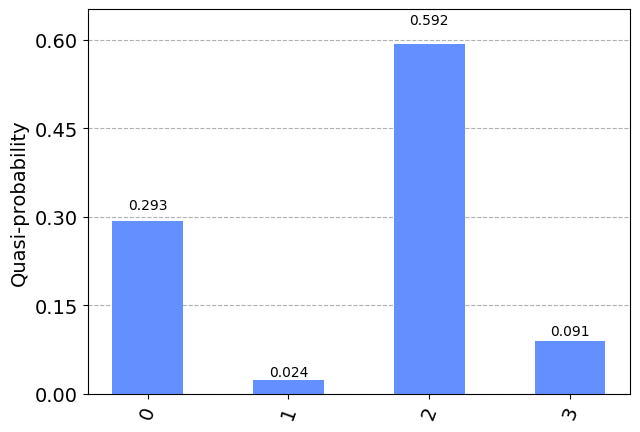

base_primitive._run_primitive:INFO:2023-11-13 22:27:45,572: Submitting job using options {'optimization_level': 3, 'resilience_level': 1, 'max_execution_time': None, 'transpilation': {'skip_transpilation': False, 'initial_layout': None, 'layout_method': None, 'routing_method': None, 'approximation_degree': None, 'optimization_settings': {'level': 3}, 'coupling_map': None, 'basis_gates': None}, 'resilience': {'noise_amplifier': 'TwoQubitAmplifier', 'noise_factors': (1, 3, 5), 'extrapolator': 'LinearExtrapolator', 'level': 1}, 'execution': {'shots': 100, 'init_qubits': True, 'noise_model': None, 'seed_simulator': None}, 'environment': {'log_level': 'WARNING', 'callback': None, 'job_tags': []}, 'simulator': {'noise_model': None, 'seed_simulator': None, 'coupling_map': None, 'basis_gates': None}}


Iteration: 8, layers 90, Job_ID: <bound method JobV1.job_id of <RuntimeJob('cn9a5rqpb7t0008r2pd0', 'sampler')>>
Iteration: 8, layers 90, counts: [{0: 0.2301412132620189, 1: 0.012277895665645062, 2: 0.6236724364882905, 3: 0.1339084545840455}]


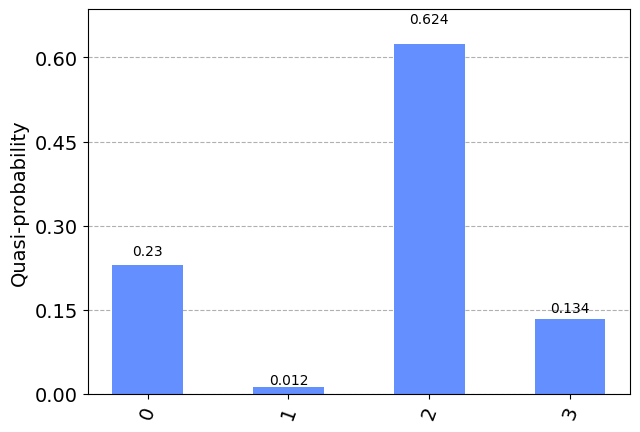

base_primitive._run_primitive:INFO:2023-11-13 22:28:07,528: Submitting job using options {'optimization_level': 3, 'resilience_level': 1, 'max_execution_time': None, 'transpilation': {'skip_transpilation': False, 'initial_layout': None, 'layout_method': None, 'routing_method': None, 'approximation_degree': None, 'optimization_settings': {'level': 3}, 'coupling_map': None, 'basis_gates': None}, 'resilience': {'noise_amplifier': 'TwoQubitAmplifier', 'noise_factors': (1, 3, 5), 'extrapolator': 'LinearExtrapolator', 'level': 1}, 'execution': {'shots': 100, 'init_qubits': True, 'noise_model': None, 'seed_simulator': None}, 'environment': {'log_level': 'WARNING', 'callback': None, 'job_tags': []}, 'simulator': {'noise_model': None, 'seed_simulator': None, 'coupling_map': None, 'basis_gates': None}}


Iteration: 9, layers 100, Job_ID: <bound method JobV1.job_id of <RuntimeJob('cn9a5y71mh9g008ye5eg', 'sampler')>>
Iteration: 9, layers 100, counts: [{0: 0.20761209564783917, 1: 0.04969610400323961, 2: 0.7210172636384544, 3: 0.021674536710466777}]


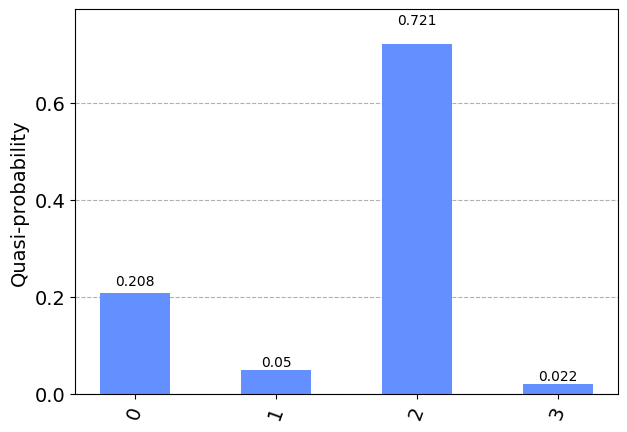

In [43]:
service = QiskitRuntimeService()
backend = service.least_busy(simulator=False, operational=True)

sampler = Sampler(backend)

circuit = intialization
experiment_data_qc = {}
circuit_data_qc = {}

for iteration in range(10):
    
    for i in range(10):
        circuit = circuit.compose(double_parallel_H)
        
    circuit_measurement = circuit.compose(measurements)    
    job_qc = sampler.run(circuits=circuit_measurement, shots = 100)   
    print("Iteration: {}, layers {}, Job_ID: {}".format(iteration, (iteration+1)*10, job_qc.job_id))   
    
    circuit_data_qc[iteration] = circuit_measurement
    experiment_data_qc[iteration] = job_qc
        
# for iteration in range(3):
#     circuit_measurement = circuit_data_qc[iteration]
#     job_qc = experiment_data_qc[iteration]
    result_qc = job_qc.result()
    counts = result_qc.quasi_dists
        
    print("Iteration: {}, layers {}, counts: {}".format(iteration, (iteration+1)*10, counts))   
    display(plot_histogram(counts))